In [76]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer, AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import qiskit



# Ustawienie liczby kubitów
num_qubits = 6
# Ustawienie ukrytego ciągu bitów
s = '111011'

# Utworzenie obwodu kwantowego z 7 (num_qubits+1) kubitami i 6 klasycznymi bitami do pomiarów
qc = QuantumCircuit(num_qubits +1, num_qubits)

# Dodanie bramek Hadamarda do wszystkich kubitów oprócz q6
for qubit in range(num_qubits):
    qc.h(qubit)

# Dodanie bramki X na q6
qc.x(num_qubits)

# Dodanie bramki Hadamarda na q6
qc.h(num_qubits)

# Bariera
qc.barrier()

# Odwrócenie kolejności ciągu bitów
# s = s[::-1] 

# Dodawanie bramek CX z wykorzystaniem ukrytego ciągu bitów (CNOTów)
for q in range(num_qubits):
    if s[q] == '1':
        qc.cx(q, num_qubits)

# Bariera
qc.barrier()

# Dodawanie bramek Hadamarda do wszystkich kubitów oprócz q6
for qubit in range(num_qubits):
    qc.h(qubit)

# Bariera
qc.barrier()

# Pomiar wszystkich kubitów
qc.measure(range(num_qubits), range(num_qubits))

# Wykonywanie obwodu na symulatorze lokalnym
simulator = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(qc)
results = simulator.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

 > Counts: 1024
 > Counts: DataBin<>(c=BitArray(<shape=(), num_shots=1024, num_bits=6>))


PubResult(data=DataBin<>(c=BitArray(<shape=(), num_shots=1024, num_bits=6>)))

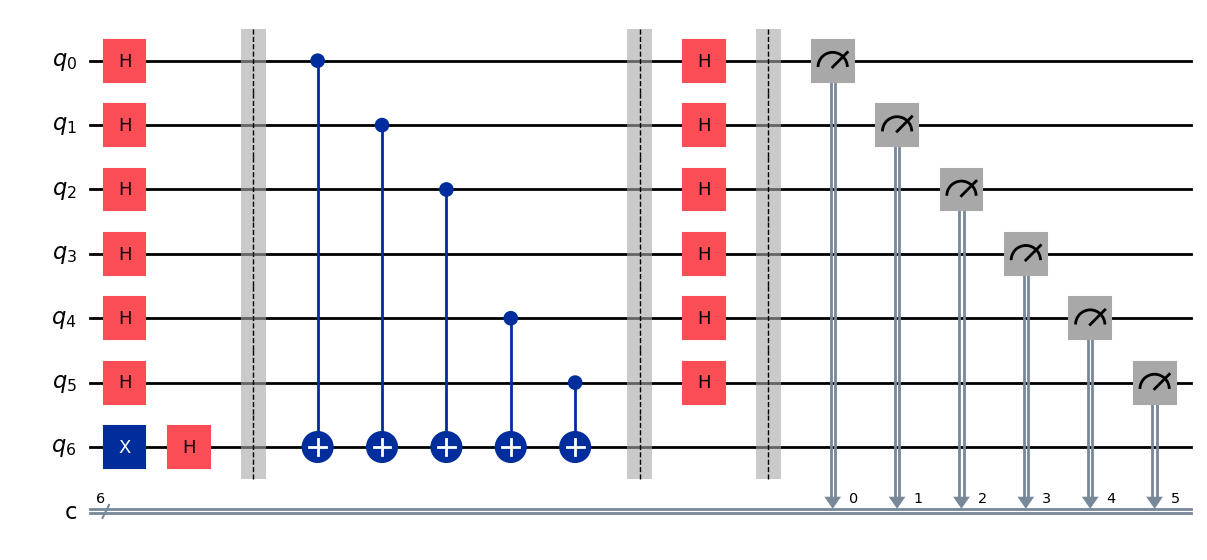

In [2]:
# Rysowanie obwodu
# qc.draw(style='clifford')
qc.draw('mpl')

In [3]:
qiskit.__version__

'1.0.2'

In [4]:
from qiskit_ibm_runtime import QiskitRuntimeService
from dotenv import load_dotenv
load_dotenv()
import os

IBM_API_TOKEN = os.getenv('IBM_API_TOKEN')

In [5]:
# Połączenie z IBM API
service = QiskitRuntimeService(channel='ibm_quantum',
                                token=IBM_API_TOKEN)

In [6]:
# Uzyskanie backendu (jednego z środowisk) do uruchomienia algorytmu w środowisku kwantowym
backend = service.least_busy(operational=True, simulator=False)

In [7]:
# Sprawdzenie ilości kubitów dostępnych na środowisku
backend.num_qubits

127

/tmp/ipykernel_15166/441013589.py:4: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_bv_circuit, shots=shots)


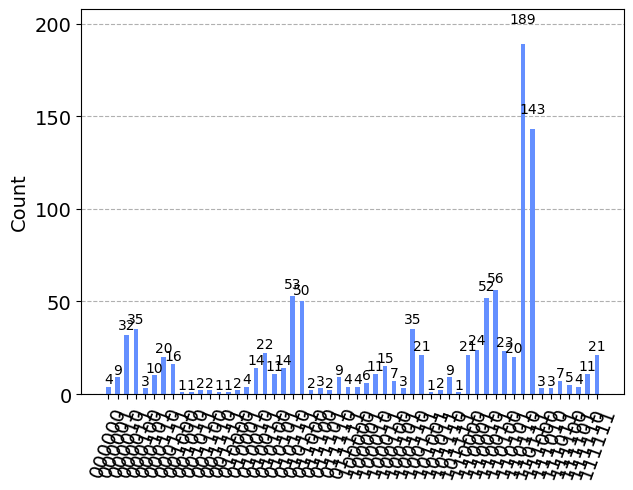

In [8]:
# Uruchomienie algorytmu na środowisku IBM
shots = 1024
transpiled_bv_circuit = transpile(qc, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

results = job.result()
answer = results.get_counts()

plot_histogram(answer)

# 2. Jaki sens ma działanie bramek Hadamarda dla qubitów q0 - q5?

### Bramki dla qubitów q0 - q5 zastosowane są do utworzenia superpozycji stanów, co pozwala na wykorzystanie zajwiska interferencji kwantowej.
### Zastosowanie bramek sprawia że układ znaduje się w superpozycji wszystkich możliwych stanów od ∣000000⟩ do ∣111111⟩. Oznacza to że działanie
### "wyroczni" (oracle), które zastępuje później, jest aplikowane równocześnie na wszystkie te stany.
### Po zastosowaniu bramek CNOT kolejne użycie bramek działą na zasadzie odkodowywania informacji z superpozycji.
### Bez zastosowania bramek Hadamarda, wynik pomiaru odzwierciedlałby stany wejściowe kubitów.

 # 3. Operator ”wyroczni” jest zbudowany z bramek CNOT. Jaki jest sens logiczny tego operatora?


### Logiczny sens tego operatora polega na przekształceniu stanu kwantowego w taki sposób, aby pozwalić na odczytani ukrytego ciągu "s" za pomocą jednego zapytania do wyroczni.
### Działania te pozwalają na "zakodowanie" ciągu s, przy wykorzystaniu superpozycji i kwantowej interferencji, co pozwala na odtworzenie s bezpośrednio w wyniku pomiaru.
### Zastosowanie superpozycji i splątania pozwala na osiągnięcie wyników, niemożliwych w klasycznych systemie obliczeniowym

# 4. Jaką rolę w obwodzie pełni qubit q6 i dlaczego pierwszym działaniem wykonanym na tym qubicie jest bramka X?

### q6, czyli qn w ogólnym zamyśle, nazywany qubitem pomocniczym, odgrywa kluczową role w procesie wyroczni. Jest on wykorzystywany do wzmocnienie efektu operacji 
### wyroczni na pozostałe kubity i umożliwia kodowanie ukrytego ciągu bitów s poprzez interferencję
### Bramka X (NOT), działa na kubit zmieniając jego stan z |0⟩ na |1⟩ i odwrotnie.
### Zastosowanie bramki m ana celu przygotowanie stanu o zmiennej fazie, a następnie tak przygotowany qubit transformowany jest do superpozycji z zmienną fazą między składowymi superpozycji.
### Dzięki takiemu zabiegowi po zastosowaniu Hadamarda stan |1⟩ staje się  $\frac{|0⟩ - |1⟩ }{\sqrt(2)}$ a nie typowy dla Hadamarda $\frac{|0⟩ + |1⟩ }{\sqrt(2)}$
### W późniejszym etapie zastosowanie bramek CNOT między kubitami reprezentującymi ciąg s a kubitem q6, obceność fazy ujemnej w stanie q6 powoduje, że te bramki CNOT działają na zasadzie 
### kontrolowanej zmiany fazy. Oznacza to, że dla każdego kubitu kontrolnego w stanie |1⟩, stan pomocniczego kubitu q6, zostaje zamieniony w taki sposób, że jego faza
### odwraca się w stosunku do pozostałych stanów. 


/tmp/ipykernel_15166/3069072656.py:48: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = simulator.run(qobj).result()


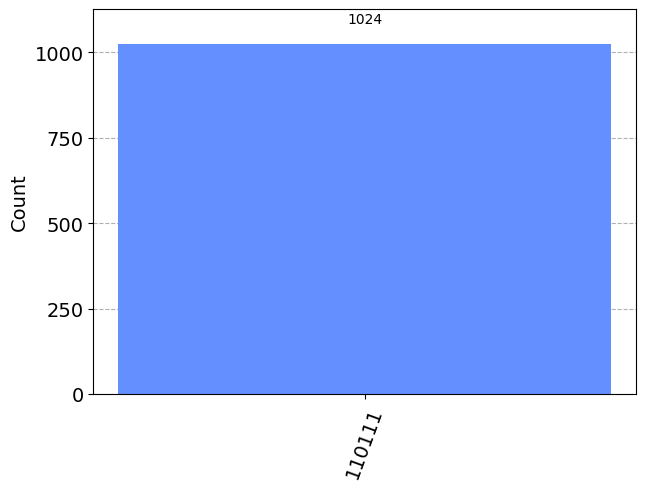

In [9]:
# Ustawienie liczby kubitów
num_qubits = 6

# Utworzenie obwodu kwantowego z 7 (num_qubits+1) kubitami i 6 klasycznymi bitami do pomiarów
qc2 = QuantumCircuit(num_qubits +1, num_qubits)

# Dodanie bramek Hadamarda do wszystkich kubitów oprócz q6
# Po to aby qibity zwracały state 0 
for qubit in range(num_qubits):
    qc2.h(qubit)

# Dodanie bramki X na q6
qc2.x(num_qubits)

# Dodanie bramki Hadamarda na q6
qc2.h(num_qubits)

# Bariera
qc2.barrier()

# Dodanie bramek CX na podstawie przesłanego schematu
qc2.cx(5, 6)
qc2.cx(4, 6)
qc2.cx(1, 6)
qc2.cx(2, 6)
qc2.cx(0, 6)

# Bariera
qc2.barrier()

# Dodawanie bramek Hadamarda do wszystkich kubitów oprócz q6
for qubit in range(num_qubits):
    qc2.h(qubit)

# Bariera
qc2.barrier()

# Pomiar wszystkich kubitów
qc2.measure(range(num_qubits), range(num_qubits))

# Rysowanie obwodu
# print(qc.draw())

# Wykonywanie obwodu na symulatorze
simulator = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(qc)
results = simulator.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

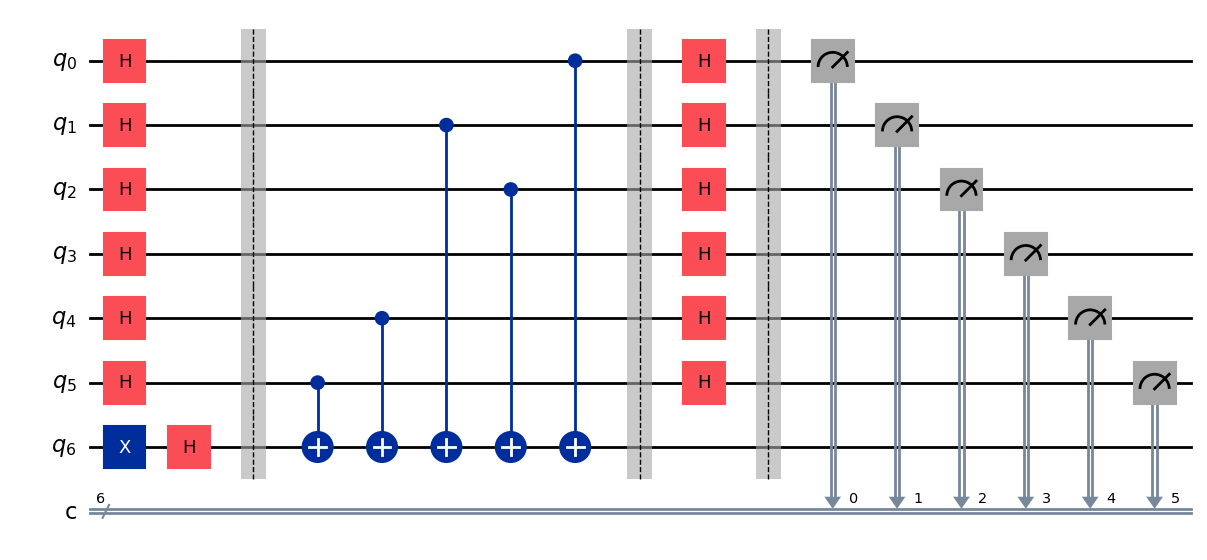

In [10]:
# Rysowanie obwodu
qc2.draw('mpl')

/tmp/ipykernel_15166/3515200114.py:4: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime.
  job = backend.run(transpiled_bv_circuit, shots=shots)


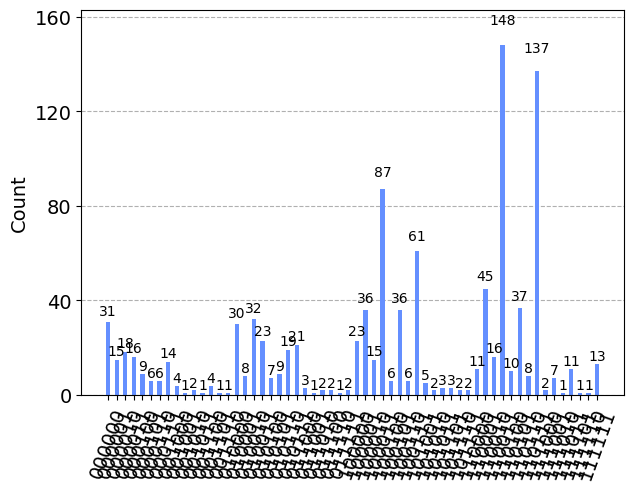

In [11]:
# Uruchomienie algorytmu na środowisku IBM
shots = 1024
transpiled_bv_circuit = transpile(qc2, backend)
job = backend.run(transpiled_bv_circuit, shots=shots)

results = job.result()
answer = results.get_counts()

plot_histogram(answer)